## Why ridge regression? to overcome overfitting

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("diabetes.csv")

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.shape

(768, 9)

In [53]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
df.isnull().sum()   

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.33, random_state = 42)

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

In [63]:
parameters = {'alpha':[2,4,8,10,100,200,500,100]}
ridgecv = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 10)

In [64]:
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [2, 4, 8, 10, 100, 200, 500, 100]},
             scoring='neg_mean_squared_error')

In [66]:
print(ridgecv.best_params_)

{'alpha': 500}


In [68]:
print(ridgecv.best_score_)

-0.16080129637131632


In [69]:
pred = ridgecv.predict(X_test)

In [71]:
pred

array([ 0.33440833,  0.26724427,  0.1793059 ,  0.18278181,  0.51461695,
        0.47617803, -0.18861581,  0.52427575,  0.55580446,  0.7415602 ,
        0.32268854,  0.8998269 ,  0.45562569,  0.29935535,  0.04332715,
        0.36990809,  0.18234485,  0.0701929 ,  0.80782465,  0.54875142,
        0.3036767 ,  0.09456341,  0.4938528 ,  0.1311808 ,  0.53274255,
        0.84819421,  0.17326595, -0.03238811,  0.34289439,  0.15335889,
        0.84726224,  0.8190171 ,  0.75851294,  0.70863344,  0.54458892,
        0.59179416,  1.04256734,  0.27456489,  0.50948335,  0.63780935,
        0.06217336,  0.55079043,  0.52967159,  0.34547111, -0.06007698,
        0.50096174,  0.51190358,  0.26601971,  0.36401937,  0.99261642,
        0.01536922,  0.59964641,  0.75579817,  0.30972736,  0.18888179,
       -0.02856372,  0.74554847, -0.35786179,  0.38867319,  0.72292373,
        0.66346674,  0.39190402,  0.32594049,  0.23401961,  0.10946507,
        0.58092283,  0.00477576,  0.69273654, -0.03639846,  0.71

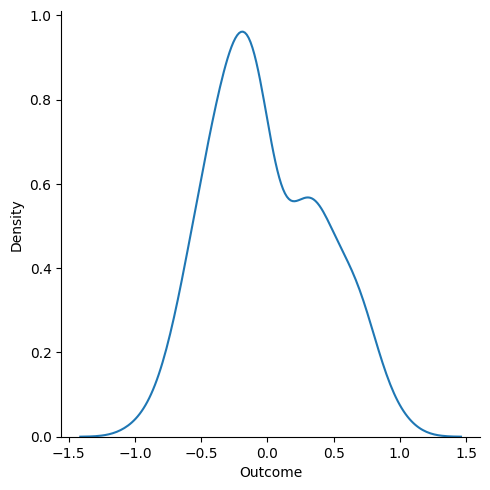

In [74]:
sns.displot(y_test-pred, kind = 'kde')

In [80]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)

In [81]:
score

0.20316779345198